In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

sentyabrskiy ru
rikitea pf
la orilla mx
hermanus za
kununurra au
khatanga ru
ocean city us
ushuaia ar
svetlaya ru
sechura pe
bengkulu id
albany au
ushuaia ar
cape town za
sioux lookout ca
bluff nz
thompson ca
bluff nz
bluff nz
khonuu ru
ruatoria nz
sao filipe cv
torbay ca
atuona pf
sentyabrskiy ru
muros es
ushuaia ar
figeac fr
amantea it
vestmanna fo
toronto ca
thompson ca
saint anthony ca
rikitea pf
mackay au
kapaa us
souillac mu
ilulissat gl
mataura pf
mataura pf
atuona pf
bismarck us
malwan in
jamestown sh
pitimbu br
muhos fi
biak id
lagoa pt
mataura pf
abha sa
port alfred za
gunnedah au
port alfred za
wattegama lk
tautira pf
babanusah sd
hithadhoo mv
hobart au
kailua us
isla mujeres mx
bandarbeyla so
hermanus za
barrow us
guisa cu
amderma ru
amderma ru
ushuaia ar
touros br
severo-kurilsk ru
tambacounda sn
thompson ca
erenhot cn
bay roberts ca
constantine dz
albany au
waiuku nz
grindavik is
oda jp
puerto carreno co
port-gentil ga
barra do corda br
cagayan de tawi-tawi ph
san policar

busselton au
mataura pf
buala sb
tuatapere nz
dordrecht za
thompson ca
laguna br
asau tv
albany au
omsukchan ru
albany au
sataua ws
puerto ayora ec
poum nc
geraldton au
saint-pierre re
punta arenas cl
vasilevo mk
barawe so
ushuaia ar
east london za
chokurdakh ru
hilo us
rikitea pf
saskylakh ru
cape town za
road town vg
avarua ck
kovvur in
tumannyy ru
atuona pf
galesong id
taolanaro mg
the valley ai
hobart au
zabol ir
yar-sale ru
atuona pf
sao paulo de olivenca br
veraval in
taolanaro mg
albany au
auki sb
hilo us
taolanaro mg
chuy uy
sentyabrskiy ru
praia da vitoria pt
thompson ca
ushuaia ar
kapaa us
east london za
conde br
east london za
attawapiskat ca
ushuaia ar
atuona pf
castro cl
lata sb
iguape br
pangai to
bluff nz
tezu in
norman wells ca
rikitea pf
puerto ayora ec
acapulco mx
ushuaia ar
nizhneyansk ru
hithadhoo mv
hobart au
puerto ayora ec
tuktoyaktuk ca
shamary ru
albany au
vaitupu wf
tsihombe mg
teneguiban ph
atuona pf
ushuaia ar
zanjan ir
vaini to
barrow us
hofn is
marfino ru


champerico gt
bilibino ru
tabarqah tn
lebu cl
porto novo cv
busselton au
jamestown sh
avarua ck
dushanbe tj
jamestown sh
illoqqortoormiut gl
bathsheba bb
hithadhoo mv
ribeira grande pt
qaanaaq gl
makinsk kz
mataura pf
tomohon id
tromso no
saleaula ws
ca mau vn
nicoya cr
vaini to
sakassou ci
punta arenas cl
zhanatas kz
barrow us
hobart au
mataura pf
cheuskiny ru
pevek ru
jamestown sh
punta arenas cl
avarua ck
ushuaia ar
tucuman ar
castro cl
cherskiy ru
barentsburg sj
kruisfontein za
busselton au
punta arenas cl
busselton au
esperance au
mataura pf
dali cn
rikitea pf
albany au
snasa no
lavrentiya ru
puerto ayora ec
avarua ck
pevek ru
lebu cl
beauvais fr
albany au
hilo us
mys shmidta ru
calvinia za
olga ru
rikitea pf
poum nc
atuona pf
rikitea pf
tuktoyaktuk ca
mantua cu
hualmay pe
mustasaari fi
rikitea pf
shingu jp
taolanaro mg
xinzhi cn
lompoc us
constitucion mx
puerto ayora ec
cape town za
fortuna us


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [8]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=302b37f99151e7a3392d87b0c9c3f40e


In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | la orilla
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | kununurra
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | ocean city
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | svetlaya
Processing Record 10 of Set 1 | sechura
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | sioux lookout
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | khonuu
City not found. Skipping...
Processing Record 18 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | atuona
Pr

Processing Record 40 of Set 4 | tuktoyaktuk
Processing Record 41 of Set 4 | te anau
Processing Record 42 of Set 4 | san juan
Processing Record 43 of Set 4 | roald
Processing Record 44 of Set 4 | saint-francois
Processing Record 45 of Set 4 | luanda
Processing Record 46 of Set 4 | margate
Processing Record 47 of Set 4 | tugulym
Processing Record 48 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 49 of Set 4 | poddorye
Processing Record 50 of Set 4 | new norfolk
Processing Record 1 of Set 5 | vanimo
Processing Record 2 of Set 5 | clyde river
Processing Record 3 of Set 5 | iqaluit
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | norman wells
Processing Record 6 of Set 5 | khash
Processing Record 7 of Set 5 | yumen
Processing Record 8 of Set 5 | hunza
City not found. Skipping...
Processing Record 9 of Set 5 | ambilobe
Processing Record 10 of Set 5 | aliwal north
Processing Record 11 of Set 5 | codrington
Processing Record 12 of Set 5 | harboore
Pro

City not found. Skipping...
Processing Record 28 of Set 8 | zanjan
Processing Record 29 of Set 8 | hofn
Processing Record 30 of Set 8 | marfino
Processing Record 31 of Set 8 | pamanukan
Processing Record 32 of Set 8 | dieppe
Processing Record 33 of Set 8 | arraial do cabo
Processing Record 34 of Set 8 | beisfjord
Processing Record 35 of Set 8 | belen
Processing Record 36 of Set 8 | hong gai
Processing Record 37 of Set 8 | orlesti
Processing Record 38 of Set 8 | pimentel
Processing Record 39 of Set 8 | namwala
Processing Record 40 of Set 8 | balikpapan
Processing Record 41 of Set 8 | isiolo
Processing Record 42 of Set 8 | kpandu
Processing Record 43 of Set 8 | callaway
Processing Record 44 of Set 8 | santa maria
Processing Record 45 of Set 8 | daru
Processing Record 46 of Set 8 | vikhorevka
Processing Record 47 of Set 8 | yarada
Processing Record 48 of Set 8 | nurota
Processing Record 49 of Set 8 | salalah
Processing Record 50 of Set 8 | halalo
City not found. Skipping...
Processing Rec

Processing Record 17 of Set 12 | chikwawa
Processing Record 18 of Set 12 | coruripe
Processing Record 19 of Set 12 | jatara
Processing Record 20 of Set 12 | isla vista
Processing Record 21 of Set 12 | bassano
Processing Record 22 of Set 12 | plainview
Processing Record 23 of Set 12 | antu
Processing Record 24 of Set 12 | cayenne
Processing Record 25 of Set 12 | berlevag
Processing Record 26 of Set 12 | marcona
City not found. Skipping...
Processing Record 27 of Set 12 | winder
Processing Record 28 of Set 12 | barra do garcas
Processing Record 29 of Set 12 | kangasala
Processing Record 30 of Set 12 | walvis bay
Processing Record 31 of Set 12 | kirakira
Processing Record 32 of Set 12 | sao gabriel da cachoeira
Processing Record 33 of Set 12 | bage
Processing Record 34 of Set 12 | broome
Processing Record 35 of Set 12 | dalby
Processing Record 36 of Set 12 | taltal
Processing Record 37 of Set 12 | longyan
Processing Record 38 of Set 12 | edson
Processing Record 39 of Set 12 | tucurui
Proc

In [13]:
print(city_data)

[{'City': 'Rikitea', 'Lat': -23.1203, 'Lng': -134.9692, 'Max Temp': 78.91, 'Humidity': 68, 'Cloudiness': 50, 'Wind Speed': 6.76, 'Country': 'PF', 'Date': '2022-03-09 22:35:15'}, {'City': 'La Orilla', 'Lat': 17.9833, 'Lng': -102.2333, 'Max Temp': 80.85, 'Humidity': 53, 'Cloudiness': 11, 'Wind Speed': 11.12, 'Country': 'MX', 'Date': '2022-03-09 22:35:15'}, {'City': 'Hermanus', 'Lat': -34.4187, 'Lng': 19.2345, 'Max Temp': 68.9, 'Humidity': 89, 'Cloudiness': 78, 'Wind Speed': 8.34, 'Country': 'ZA', 'Date': '2022-03-09 22:35:15'}, {'City': 'Kununurra', 'Lat': -15.7667, 'Lng': 128.7333, 'Max Temp': 80.58, 'Humidity': 89, 'Cloudiness': 51, 'Wind Speed': 0, 'Country': 'AU', 'Date': '2022-03-09 22:35:16'}, {'City': 'Khatanga', 'Lat': 71.9667, 'Lng': 102.5, 'Max Temp': -4.32, 'Humidity': 97, 'Cloudiness': 100, 'Wind Speed': 5.84, 'Country': 'RU', 'Date': '2022-03-09 22:35:16'}, {'City': 'Ocean City', 'Lat': 39.2776, 'Lng': -74.5746, 'Max Temp': 44.62, 'Humidity': 91, 'Cloudiness': 100, 'Wind Spe

In [14]:
len(city_data)

567

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.91,68,50,6.76,PF,2022-03-09 22:35:15
1,La Orilla,17.9833,-102.2333,80.85,53,11,11.12,MX,2022-03-09 22:35:15
2,Hermanus,-34.4187,19.2345,68.90,89,78,8.34,ZA,2022-03-09 22:35:15
3,Kununurra,-15.7667,128.7333,80.58,89,51,0.00,AU,2022-03-09 22:35:16
4,Khatanga,71.9667,102.5000,-4.32,97,100,5.84,RU,2022-03-09 22:35:16
5,Ocean City,39.2776,-74.5746,44.62,91,100,8.99,US,2022-03-09 22:35:16
6,Ushuaia,-54.8000,-68.3000,49.66,71,40,14.97,AR,2022-03-09 22:35:17
7,Svetlaya,46.5389,138.3297,30.67,71,7,2.62,RU,2022-03-09 22:35:17
8,Sechura,-5.5569,-80.8222,80.71,61,50,15.66,PE,2022-03-09 22:35:17
9,Bengkulu,-3.8004,102.2655,75.52,86,99,4.03,ID,2022-03-09 22:35:18


In [16]:
# Changing the column order.
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-03-09 22:35:15,-23.1203,-134.9692,78.91,68,50,6.76
1,La Orilla,MX,2022-03-09 22:35:15,17.9833,-102.2333,80.85,53,11,11.12
2,Hermanus,ZA,2022-03-09 22:35:15,-34.4187,19.2345,68.90,89,78,8.34
3,Kununurra,AU,2022-03-09 22:35:16,-15.7667,128.7333,80.58,89,51,0.00
4,Khatanga,RU,2022-03-09 22:35:16,71.9667,102.5000,-4.32,97,100,5.84
5,Ocean City,US,2022-03-09 22:35:16,39.2776,-74.5746,44.62,91,100,8.99
6,Ushuaia,AR,2022-03-09 22:35:17,-54.8000,-68.3000,49.66,71,40,14.97
7,Svetlaya,RU,2022-03-09 22:35:17,46.5389,138.3297,30.67,71,7,2.62
8,Sechura,PE,2022-03-09 22:35:17,-5.5569,-80.8222,80.71,61,50,15.66
9,Bengkulu,ID,2022-03-09 22:35:18,-3.8004,102.2655,75.52,86,99,4.03


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

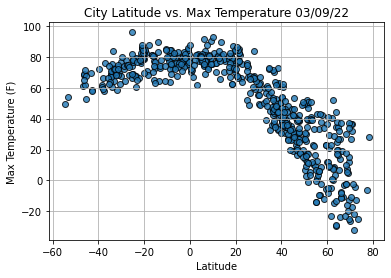

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

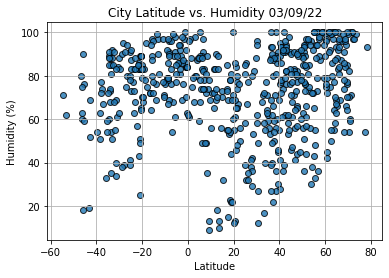

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

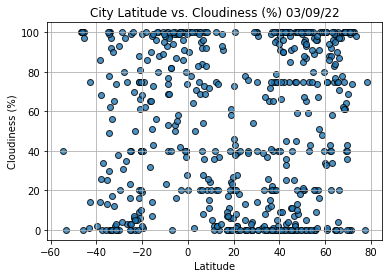

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

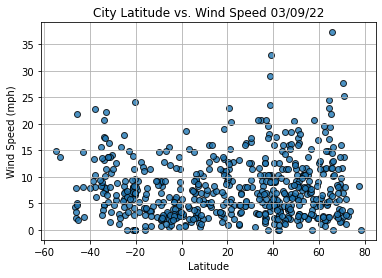

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


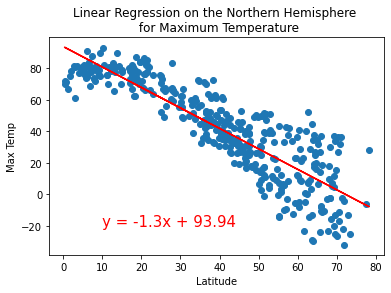

In [46]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,-20), fontsize=15, color="red")
plt.title('Linear Regression on the Northern Hemisphere \n for Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

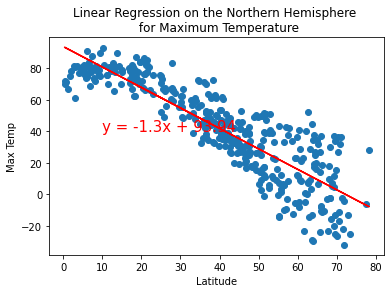

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


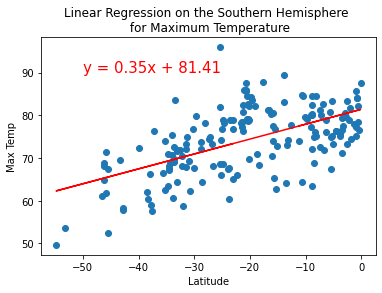

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

In [49]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

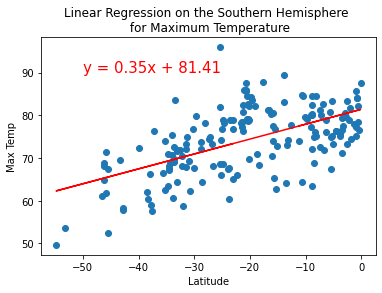

In [50]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-50,90), fontsize=15, color="red")
plt.title('Linear Regression on the Southern Hemisphere \n for Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

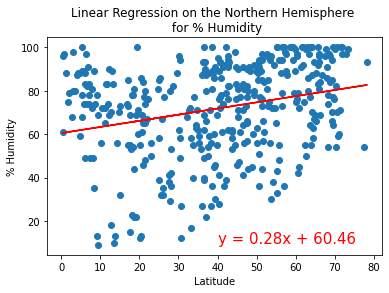

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

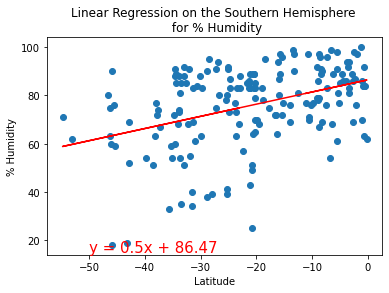

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

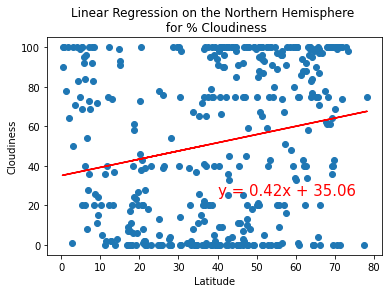

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness', (40,25))

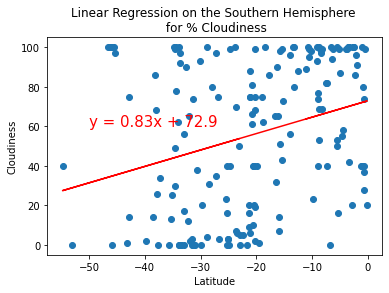

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 'Cloudiness', (-50,60))

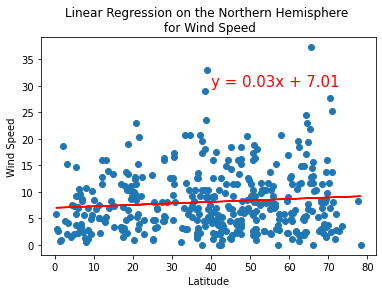

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))


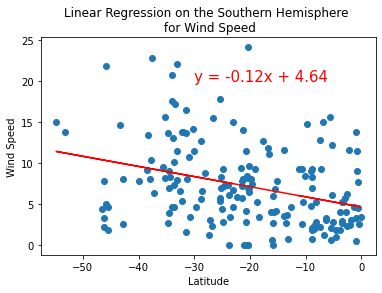

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-30,20))